# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | anadyr
Processing Record 3 of Set 1 | tolanaro
Processing Record 4 of Set 1 | newman
Processing Record 5 of Set 1 | holualoa
Processing Record 6 of Set 1 | pachino
Processing Record 7 of Set 1 | nemuro
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | port mathurin
Processing Record 10 of Set 1 | al bawiti
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | college
Processing Record 13 of Set 1 | wailua homesteads
Processing Record 14 of Set 1 | cidreira
Processing Record 15 of Set 1 | isafjordur
Processing Record 16 of Set 1 | stanley
Processing Record 17 of Set 1 | garoowe
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | cabo san lucas
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | west island
Processing Record 22 of Set 1 | moussoro
Processing Record 23 o

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,53.73,61,60,3.00,AU,1702585942
1,anadyr,64.7500,177.4833,16.30,86,100,24.61,RU,1702585942
2,tolanaro,-25.0319,46.9987,78.87,83,20,20.71,MG,1702585943
3,newman,37.3138,-121.0208,63.23,60,100,1.99,US,1702585943
4,holualoa,19.6228,-155.9522,76.84,65,40,26.46,US,1702585943


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,53.73,61,60,3.00,AU,1702585942
1,anadyr,64.7500,177.4833,16.30,86,100,24.61,RU,1702585942
2,tolanaro,-25.0319,46.9987,78.87,83,20,20.71,MG,1702585943
3,newman,37.3138,-121.0208,63.23,60,100,1.99,US,1702585943
4,holualoa,19.6228,-155.9522,76.84,65,40,26.46,US,1702585943


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

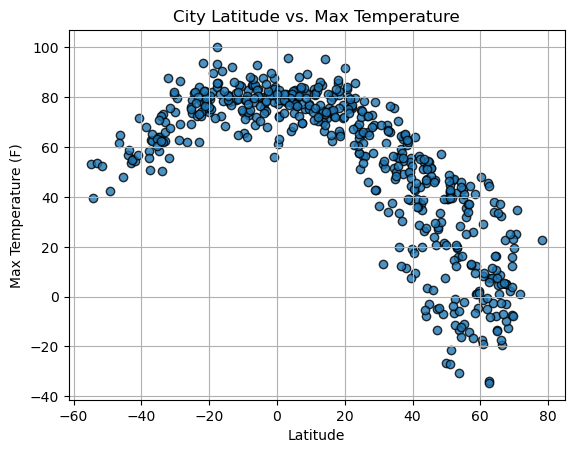

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], 
            city_data_df['Max Temp'],
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha=0.8, 
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/FigLatvTemp.png")

# Show plot
plt.show();

#### Latitude Vs. Humidity

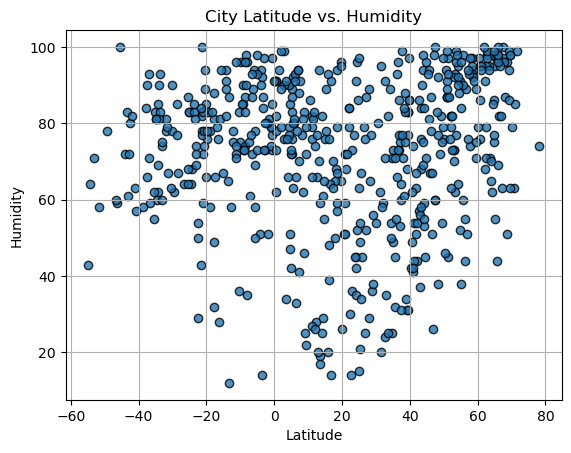

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], 
            city_data_df['Humidity'],
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha=0.8, 
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/FigLatvsHumidity.png")

# Show plot
plt.show();

#### Latitude Vs. Cloudiness

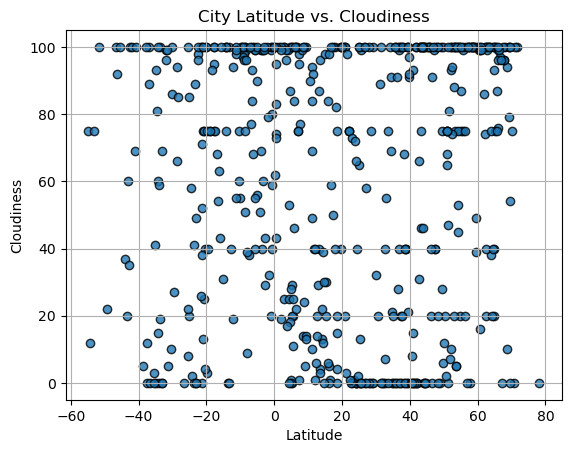

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], 
            city_data_df['Cloudiness'],
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha=0.8, 
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/FigLatvsCloudiness.png")

# Show plot
plt.show();

#### Latitude vs. Wind Speed Plot

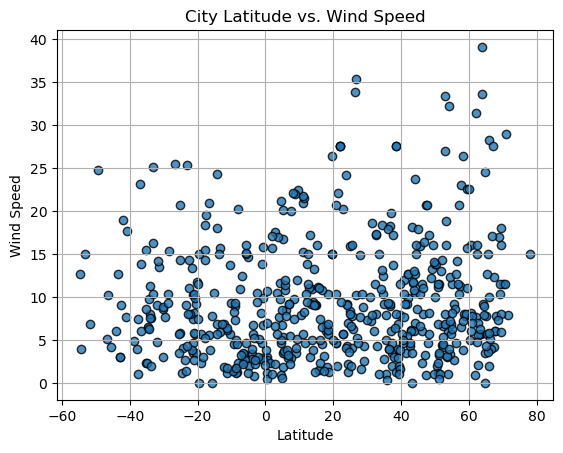

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], 
            city_data_df['Wind Speed'],
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha=0.8, 
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/FigLatvsWindSpeed.png")

# Show plot
plt.show();

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [62]:
# Define a function to create Linear Regression plots
def plot_linear_regression(df, x_column, y_column, title, x_label='Latitude', text_coordinates=(0.5,0.9)):

    x_values = df[x_column]
    y_values = df[y_column]

    # Run regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    x_coord = x_values.min() + (x_values.max() - x_values.min()) * text_coordinates[0]
    y_coord = y_values.min() + (y_values.max() - y_values.min()) * text_coordinates[1]

    plt.text(x_coord, y_coord, line_eq, fontsize=12, color="red")
    plt.xlabel(x_label)
    plt.ylabel(title)
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [53]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,anadyr,64.7500,177.4833,16.30,86,100,24.61,RU,1702585942
3,newman,37.3138,-121.0208,63.23,60,100,1.99,US,1702585943
4,holualoa,19.6228,-155.9522,76.84,65,40,26.46,US,1702585943
5,pachino,36.7186,15.0907,59.41,73,99,8.97,IT,1702585944
6,nemuro,43.3236,145.5750,26.28,68,46,18.12,JP,1702585945


In [54]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,53.73,61,60,3.00,AU,1702585942
2,tolanaro,-25.0319,46.9987,78.87,83,20,20.71,MG,1702585943
8,port mathurin,-19.6833,63.4167,79.47,76,3,14.97,MU,1702585947
10,port-aux-francais,-49.3500,70.2167,42.55,78,22,24.74,TF,1702585947
13,cidreira,-30.1811,-50.2056,74.25,90,86,8.59,BR,1702585948


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7065978235956142


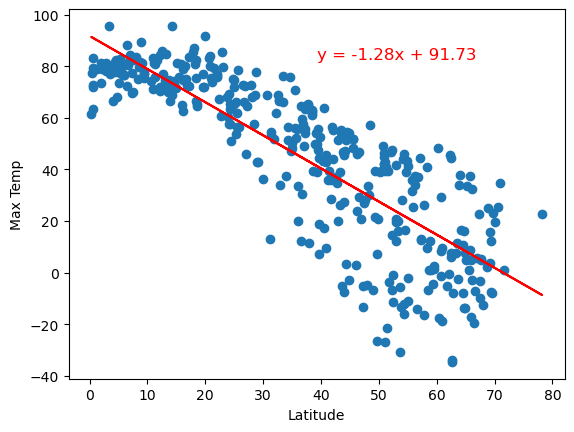

<Figure size 640x480 with 0 Axes>

In [63]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Max Temp", 'Max Temp')
plt.savefig("../output_data/NorthernHemiRegression.png")



The r-value is: 0.4712044254165529


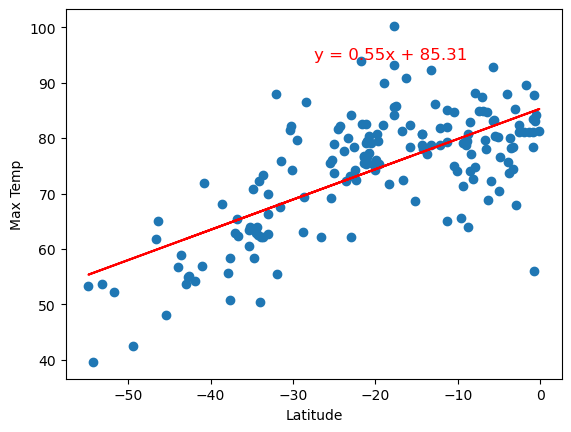

<Figure size 640x480 with 0 Axes>

In [64]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Max Temp", 'Max Temp')
plt.savefig("../output_data/SoutherHemiRegression.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Both of these plots show the temperature changing with the changing in latitute, which suggests that there could be a relationship between the two variables. For example, as the latitute increases in the southern hemisphere, the temperature goes up showing a positive correlation. Similar to how as the latitute increases in the northwestern hemisphere, the temperature goes down showing a negative correlation. This also makes sense in real-world setting because the lower latitutes in the southern hemisphere are close to the south pole (cooler constent temperatues), and the higher latitutes in the northern are closer to the north pole (also constent cooler temperatures). 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.07086561484830775


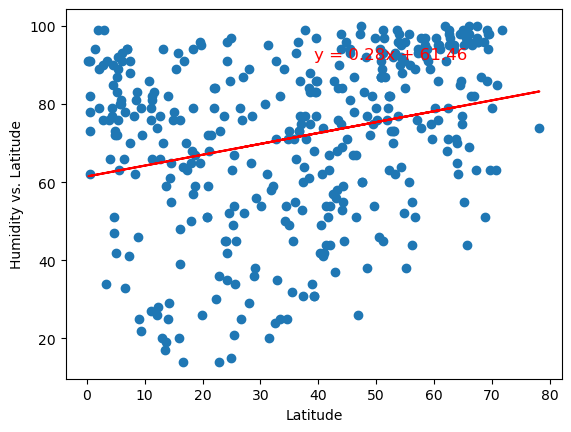

<Figure size 640x480 with 0 Axes>

In [67]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(northern_hemi_df, "Lat", "Humidity", 'Humidity vs. Latitude')
plt.savefig("../output_data/NorthernHumidityRegre.png")

The r-value is: 0.02313061279985158


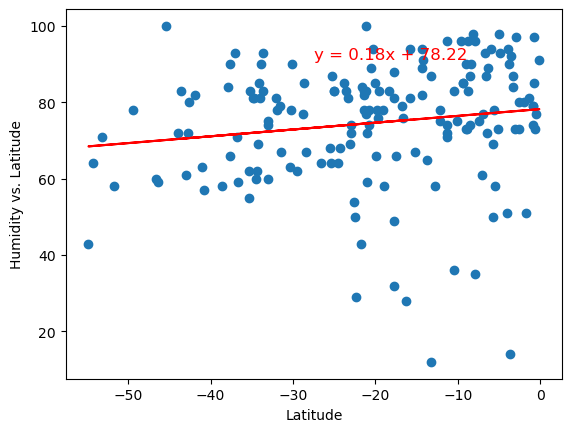

<Figure size 640x480 with 0 Axes>

In [68]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(southern_hemi_df, "Lat", "Humidity", 'Humidity vs. Latitude')
plt.savefig("../output_data/SouthernHumidityRegre.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

For Humidity versus Latitude it seems like the Northern hemisphere does not have a very defined relationship since the dots are not plotted close together and seem to be spread out. The southern hemisphere has a closer relationship with the dotes a littel more clustered so could possibly be a loose positive correlation, but I wouldn't say it was a strong one since there still seem to be a number outlaiers as the latitute increases. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03906692313744981


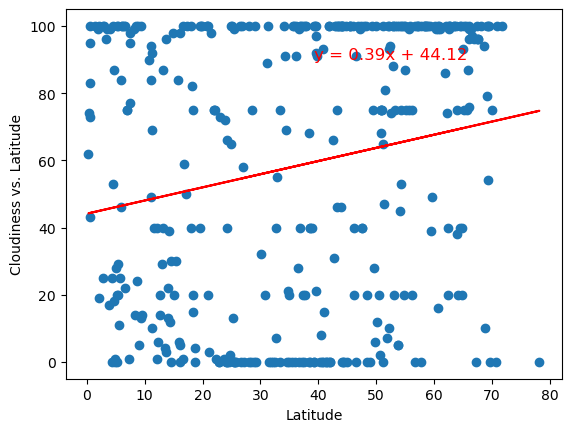

<Figure size 640x480 with 0 Axes>

In [69]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(northern_hemi_df, "Lat", "Cloudiness", 'Cloudiness vs. Latitude')
plt.savefig("../output_data/NorthernCloudinessRegre.png")

The r-value is: 0.04760996509363525


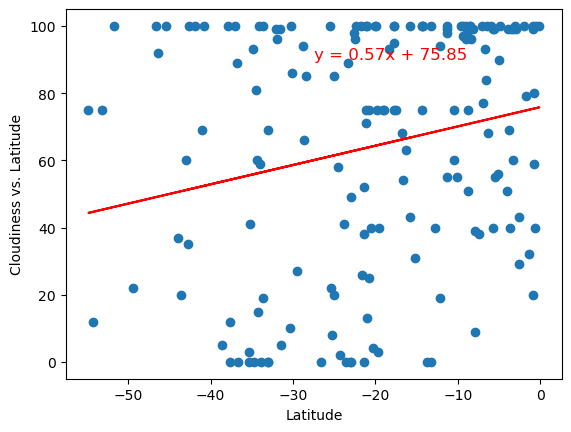

<Figure size 640x480 with 0 Axes>

In [70]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(southern_hemi_df, "Lat", "Cloudiness", 'Cloudiness vs. Latitude')
plt.savefig("../output_data/SouthernCloudinessRegre.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

For cloudines and latitude I would say that neither the northern or the southern hemisphere have a direct relationship since the dots on the scatterplot do not seem to be clustered in any direct way. It has neither a positive or negative correlation for either. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00952208874001421


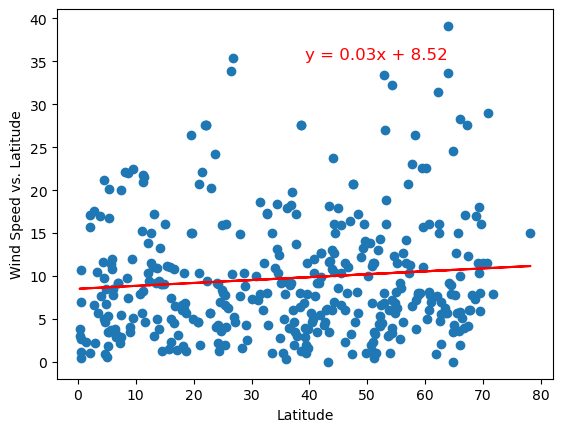

<Figure size 640x480 with 0 Axes>

In [74]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(northern_hemi_df, "Lat", "Wind Speed", 'Wind Speed vs. Latitude')
plt.savefig("../output_data/NorthernWindSpeedRegre.png")

The r-value is: 0.04033042279923112


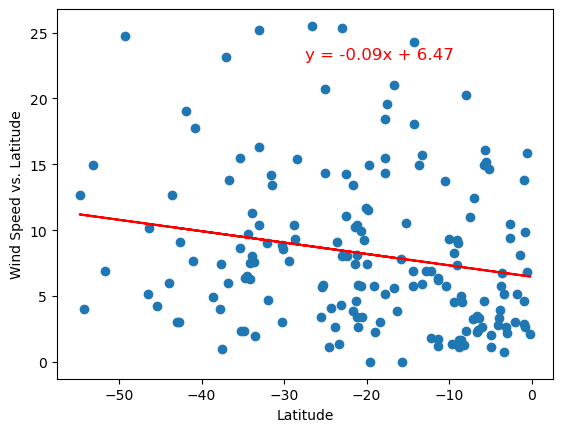

<Figure size 640x480 with 0 Axes>

In [73]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(southern_hemi_df, "Lat", "Wind Speed", 'Wind Speed vs. Latitude')
plt.savefig("../output_data/SouthernWindSpeedRegre.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

For Wind Speed and Latitude it also seems to be loose correclations at best. The northern hemisphere has a very loose positive coorelation with a slight trending up, however there are many outliers. The souther hemisphere has a very loose negative cooreclation with a slight trending down but it also have many outliers. I would say that neither correlation is very strong. 